# Bayesian Neural Networks to Predict Hard Landing with DASHlink Data
Authors: Dr. Yingxiao Kong, Vanderbilt University

Email: yingxiao.kong@vanderbit.edu

## Overview of Research
In this work, we use an open-source dataset - [NASA's DASHlink data](https://c3.ndc.nasa.gov/dashlink/) - to isolate data for landing aircraft that both have hard landing and normal landing occurrences. The objective is to use [this sample data](https://c3.ndc.nasa.gov/dashlink/projects/85/resources/?type=ds) to train a Bayesian Neural Network model to predict touchdown vertical speed for a landing aircraft with the intent to use as a screening for identifying hard landing events before they occur.

This series of Jupyter notebook demonstrations into 3 modules. The presented module is in **bold**:
- Module 1 - Download DASHlink Data
- Module 2 - DASHlink Data Pre-Processing and Feature Selection with Maximum Relevance and Minimum Reduandancy (MRMR)
- **Module 3 - Bayesian Neural Network Model Training**

## Module 3: Bayesian Neural Network Model Training

## Step 3a: Get Processed Data and Ordered Features from Module 2

In [1]:
import pandas as pd
df_landing = pd.read_csv('processed_data_landing_at_msp.csv')
df_features = pd.read_csv('ordered_features.csv')

In [2]:
df_landing

,LATP,LONP,MSQT_1,BAL1,TAS,GS,TH,FLAP,GLS,LOC,...,WS,WD,ALTR,TD_ALTR,TD_LAT,TD_LON,TD_ALT,heights,DIST,filepath
0,44.891682,-93.241822,1.0,1006.643045,117.933373,115.007588,125.581422,3645.000000,0.014040,-0.003136,...,10.948235,-159.834434,-536.630359,-104.780302,44.886191,-93.228955,806.643045,200,1185.595409,../../../dashlink-data/Tail_687_8/687200312300...
1,44.888764,-93.234960,1.0,906.643045,115.530863,111.638458,125.322379,3645.000000,0.183690,0.003136,...,9.932823,-165.738392,-709.834437,-104.780302,44.886191,-93.228955,806.643045,100,553.902372,../../../dashlink-data/Tail_687_8/687200312300...
2,44.887734,-93.232386,1.0,856.643045,113.021779,110.749442,123.876531,3645.000000,0.133380,0.003332,...,6.212059,-163.252476,-823.996865,-104.780302,44.886191,-93.228955,806.643045,50,320.767080,../../../dashlink-data/Tail_687_8/687200312300...
3,44.887502,-93.231929,1.0,846.643045,112.537305,110.196048,124.172654,3645.000000,0.136028,0.002001,...,6.975467,-166.607074,-688.934215,-104.780302,44.886191,-93.228955,806.643045,40,276.478561,../../../dashlink-data/Tail_687_8/687200312300...
4,44.887351,-93.231586,1.0,836.643045,111.188473,109.765476,124.137817,3645.000000,0.133199,0.002040,...,6.994513,-160.733711,-773.697501,-104.780302,44.886191,-93.228955,806.643045,30,244.578379,../../../dashlink-data/Tail_687_8/687200312300...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,44.887365,-93.231276,1.0,801.660295,119.045969,122.383108,121.647424,3644.920019,0.080462,0.000180,...,3.032836,-91.452123,-512.653856,-273.900805,44.886876,-93.229997,793.660295,8,114.775389,../../../dashlink-data/Tail_687_9/687200404201...
12560,44.887048,-93.230487,1.0,799.660295,118.861990,121.907043,121.667286,3644.000000,0.225420,0.004508,...,2.988509,-93.546465,-519.707422,-273.900805,44.886876,-93.229997,793.660295,6,43.200668,../../../dashlink-data/Tail_687_9/687200404201...
12561,44.887048,-93.230487,1.0,797.660295,118.695668,121.564014,121.704144,3644.000000,0.225420,0.004508,...,2.964133,-96.950775,-478.709966,-273.900805,44.886876,-93.229997,793.660295,4,43.200668,../../../dashlink-data/Tail_687_9/687200404201...
12562,44.887048,-93.230487,1.0,795.660295,118.034660,121.214700,121.752453,3644.000000,0.225420,0.004508,...,2.938901,-100.353347,-444.224532,-273.900805,44.886876,-93.229997,793.660295,2,43.200668,../../../dashlink-data/Tail_687_9/687200404201...


In [3]:
df_features

,0.0,0.25,0.5,0.75,1.0
0,ALTR,ALTR,ALTR,ALTR,ALTR
1,CCPC,CCPC,CCPC,CCPC,CCPC
2,ELEV_1,ELEV_1,BLAC,BLAC,BLAC
3,PTCH,PTCH,ELEV_1,ELEV_1,GLS
4,N1_1,N1_1,PTCH,PTCH,ELEV_1
5,GS,GS,N1_1,N1_1,PTCH
6,TAS,TAS,GS,GS,N1_1
7,WS,WS,TAS,TAS,GS
8,LONP,LONP,WS,WS,TAS
9,TH,TH,LONP,LONP,WS


### Step 3b: Create npy array with temporal dimension

In [4]:
from tqdm import tqdm
import numpy as np

height_values = [200, 100, 50, 40, 30, 20, 10, 8, 6, 4, 2]
unique_flights = df_landing['filepath'].unique()
column_order = list(df_landing.columns)
flight_vals = []
failed = []
# loop through all flights
for fpath in tqdm(unique_flights):
    tmp = df_landing[df_landing['filepath']==fpath] # filter down by filepath
    vals = []
    # get values at each specified height value 
    for h in height_values:
        hvals = tmp[tmp['heights']==h]
        if hvals.shape[0] != 1:
            failed.append(fpath) # height was not found, exclude from dataset
            break
        else:
            vals.append(hvals.values[0])
    # check if all heights were available
    if len(vals) == len(height_values):
        flight_vals.append(vals)

print('Loaded {}/{} flights'.format(len(flight_vals), len(unique_flights)))
flight_vals = np.array(flight_vals)


100%|██████████| 1047/1047 [00:16<00:00, 62.02it/s]

Loaded 1047/1047 flights


### Step 3c: Define RNN Models

In [ ]:
from sklearn.model_selection import train_test_split
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Dropout,LSTM,Activation
from keras.optimizers import Adam
from keras.regularizers import l1,l2
from keras.models import Sequential

# TODO make regulizer function an input instead of two functions
def get_RNN_model(in_shape, idrop=0.25, odrop=0.25, rdrop=0.25, weight_decay=1e-4, lr=1e-3,num_unit=100,regularizer='l2'):
    if regularizer == 'l1':
        reg = l1
    elif regularizer == 'l2':
        reg = l2
    else:
        print('Regularizer not found {}, defaulting to l2'.format(regularizer))

    input_sequence = Input(shape=in_shape)
    x = LSTM(num_unit,kernel_regularizer=reg(weight_decay),recurrent_regularizer=reg(weight_decay),bias_regularizer=reg(weight_decay),dropout=idrop,recurrent_dropout=rdrop,input_shape=(None,in_shape),\
                  kernel_initializer='random_uniform',return_sequences=True)(input_sequence, training=True)
    x = Activation('relu')(x)
    
    x = LSTM(num_unit,dropout=idrop,recurrent_dropout=rdrop,return_sequences=False,kernel_regularizer=reg(weight_decay),recurrent_regularizer=reg(weight_decay),bias_regularizer=reg(weight_decay),\
                kernel_initializer='random_uniform')(x, training=True)
    x = Activation('relu')(x)
    if odrop:
        x = Dropout(odrop)(x, training=True)
    output = Dense(1,activation='linear',kernel_regularizer=reg(weight_decay),bias_regularizer=reg(weight_decay))(x)
    model = Model(input_sequence, output)
    optimizer=Adam(lr)
    model.compile(loss='mse',metrics=['mse'],optimizer=optimizer)
    return model

    
class KerasDPprediction(object):
    def __init__(self,model):
        self.model = model
        # print(model.layers[0])
        # self.f= K.function([model.layers[0].input,K.learning_phase()],[model.layers[-1].output])
        
    def predict(self,x,n_iter=1000):
        result=[]
        for _ in range(n_iter):
            result.append(np.squeeze(self.model.predict(x, verbose=False)))
        result = np.array(result)
        
        return result

/home/jjanssen/anaconda3/envs/paraatm/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2022-12-11 18:18:59.206341: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Step 3c: Train RNNs for Given MRMR Result

In [6]:
MIN_REDUNDANCY_WEIGHT = 0.5
OUTPUT = 'TD_ALTR'
input_order=df_features.iloc[:,df_features.columns=='{}'.format(MIN_REDUNDANCY_WEIGHT)]
print(input_order)

       0.5
0     ALTR
1     CCPC
2     BLAC
3   ELEV_1
4     PTCH
5     N1_1
6       GS
7      TAS
8       WS
9     LONP
10      TH
11    LATP
12    DIST
13    BAL1
14    FPAC
15      WD
16    ROLL
17    RUDD
18     GLS
19   AIL_1
20     TRK
21    FLAP
22     LOC
23    CTAC


### Step 3d: Create functions to filter inputs and labels and normalize values

In [7]:
def filter_dataset(dataset, ninputs, label_col, height):
    col_names = input_order.values[:ninputs,0]
    input_col_idxs = [column_order.index(c) for c in col_names]
    label_col_idx = column_order.index(label_col)
    height_idx = height_values.index(height) + 1
    return dataset[:, :height_idx, input_col_idxs].copy().astype(np.float32), \
        dataset[:, :1, label_col_idx].copy().astype(np.float32)

def scale_data(inputs, labels):
    mins = inputs.min(axis=0).mean(axis=0)[None,None]
    ptps = inputs.ptp(axis=0).mean(axis=0)[None,None]
    inputs = (inputs - mins) / ptps
    labels = labels * 0.3048/60
    return inputs, labels


### Step 3e: Train and evaluate models over a range of inputs

In [8]:
import tensorflow as tf
import os

# create directory saving model and rsults
run_name = 'training_3'
if not os.path.exists(run_name):
    os.mkdir(run_name)

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

batch_size = 32 # batch size to use during training
nepochs = 2 #200 # number of epochs to train
niter = 1000 # number of dropout iterations per prediction 
NINPUTS = np.arange(4,24,4)

mae_results = np.zeros((len(height_values), len(NINPUTS)))

for i, height in enumerate(height_values[-1:]):
    for n in NINPUTS[-1:]:
        inputs, labels = filter_dataset(flight_vals, n, OUTPUT, height)
        inputs, labels = scale_data(inputs, labels)
        train_inputs,test_inputs,train_labels,test_labels=train_test_split(inputs, labels, test_size=0.2, random_state=40)
        # setup saving weights
        RNN_model = get_RNN_model(train_inputs.shape[1:])
        checkpoint_path = os.path.join(run_name, 'height{}_ninputs{}'.format(height, n), 'cp.ckpt')
        cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
        # train model
        history = RNN_model.fit(train_inputs,train_labels,batch_size=batch_size,verbose=True,epochs=nepochs,callbacks=[cp_callback])
        # test model 
        kdp_model = KerasDPprediction(RNN_model)
        y_test_pred=kdp_model.predict(test_inputs,niter)
        mean_y_test_pred = np.mean(y_test_pred,axis=0)
        rmse =np.sqrt(np.mean((mean_y_test_pred-test_labels)**2)) 
        mae = np.mean(np.abs(mean_y_test_pred-test_labels))
        mae_results[i, n] = mae 
        print(mae)



Num GPUs Available:  0
(1047, 1)
(837, 1)


2022-12-11 18:19:13.215676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-11 18:19:13.226201: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/2
27/27 [==============================] - ETA: 0s - loss: 1.2098 - mse: 1.1684
Epoch 1: saving model to training_3/height2_ninputs20/cp.ckpt
27/27 [==============================] - 165s 6s/step - loss: 1.2098 - mse: 1.1684
Epoch 2/2
 3/27 [==>...........................] - ETA: 2:55 - loss: 0.9734 - mse: 0.9342

KeyboardInterrupt: 

### Step 3f: Load Best Model and Visuallize Results

In [14]:

import re
weights_path = 'training_3/height2_ninputs20/cp.ckpt'
height_search = re.compile('height([0-9]*)')
height = int(height_search.findall(weights_path)[0])
ninputs_search = re.compile('ninputs([0-9]*)')
ninputs = int(ninputs_search.findall(weights_path)[0])

# create the test set
inputs, labels = filter_dataset(flight_vals, ninputs, OUTPUT, height)
inputs, labels = scale_data(inputs, labels)
train_inputs,test_inputs,train_labels,test_labels=train_test_split(inputs, labels, test_size=0.2, random_state=40)

# load in the trained model
RNN_model = get_RNN_model(train_inputs.shape[1:])
RNN_model.load_weights(weights_path)
print('loaded weights')
kdp_model = KerasDPprediction(RNN_model)

# predict on  test set
niter = 2
y_test_pred=kdp_model.predict(test_inputs,niter)


loaded weights
7/7 [==============================] - 18s 3s/step


(2, 210)


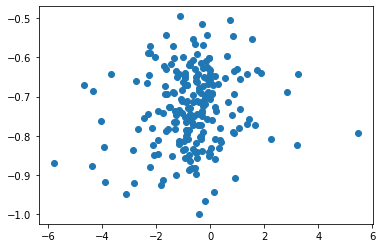

In [16]:
import matplotlib.pyplot as plt

order = np.argsort(test_labels[:,0])
labs = test_labels[order, 0]
preds = y_test_pred[:, order]

plt.scatter(labs, np.mean(preds, axis=0))
plt.xlabel('Ground Truth')
plt.ylabel('Prediction')
plt.show()


### OLD CODE REMOVE WHEN DONE

In [ ]:
grpby = df_landing.groupby(by='heights')
NINPUTS = np.arange(4,24,4)
# iterate over each height
for i,g in enumerate(grpby):
    height = g[0]
    df = g[1]
    # iterate over the number of inputs
    for n in NINPUTS:
        i = list(input_order.values[:n,0].reshape(1,n)[0])
        # down select to current model inputs and label column
        df_sub=df[i+[OUTPUT]]
        # get the full dataset 
        inputs,labels,labels_scaled,delta,z_train,diff,labels_scaled_reverse = get_train_data(df_sub)
        # split into train and test 
        train_inputs,test_inputs,train_labels,test_labels=train_test_split(inputs, labels_scaled_reverse, test_size=0.2, random_state=40)
        
        print(train_inputs.shape)
        
        # get the model
        RNN_model = get_RNN_model(train_inputs.shape[1])

        # train model
        history = RNN_model.fit(train_inputs,train_labels,batch_size=batch_size,verbose=False,epochs=nepochs)
        print(history.keys())

    # test model 
    kdp_model = KerasDPprediction(RNN_model)
    y_test_pred=kdp_model.predict(test_inputs,niter)
    mean_y_test_pred = np.mean(y_test_pred,axis=0)
    rmse =np.sqrt(np.mean((mean_y_test_pred-test_labels)**2)) 
    mae = np.mean(np.abs(mean_y_test_pred-test_labels))


In [ ]:

grpby = df_landing.groupby(by='heights')
for i,g in enumerate(grpby):
    print('here', g[0])

In [ ]:
grpby = df_landing.groupby(by='heights')
NINPUTS = np.arange(4,24,4)
for i,g in enumerate(grpby):
    print('in here', g[0])
    height = g[0]
    df = g[1]
    for n in NINPUTS:
        i = list(input_order.values[:n,0].reshape(1,n)[0])
        df_sub=df[i+[OUTPUT]]
        x_train,y_train,y_train_scale,delta,z_train,diff = get_train_data(df_sub)
          
        ## TRAIN RNN Codes - OLD CODE BELOW###

in here 0
in here 2
in here 4
in here 6
in here 8
in here 10
in here 20
in here 30
in here 40
in here 50
in here 100
in here 200


In [ ]:
for j in range(1):
    print('j: '+str(j))
    sort_index = []
    sele_col = 2
    ### sele_col: 0-4
    for i in range(all_para.shape[0]):
        if all_para[i,sele_col] in sele_key_list:
            sort_index.append(sele_key_list.index(all_para[i,sele_col]))
#     sort_index = np.insert(sort_index,0,23)

    final_RNN_x = RNN_x[:,:,sort_index]
    all_result=[]
    all_RMSE=[]
    all_MAE = []
    
    for i in np.arange(4,28,4):
        print('i: '+str(i))
        ### i is the number of parameters taken to construct the training model
        partial_data = train_data(final_RNN_x,i)
        #### the model is trained based on RNN_y_scale_reverse

        # TODO should this be y_scale_reverse or do we want to non-logged values?
        RNN_x_train,RNN_x_test,RNN_y_train,RNN_y_test=train_test_split(partial_data[:,:,:], RNN_y_scale_reverse, test_size=0.2, random_state=40)
    #     RNN_x_train,RNN_x_test,RNN_y_train,RNN_y_test=train_test_split(partial_data[:,:,:],RNN_y, test_size=0.2, random_state=40)
        RNN_model = get_RNN_model(RNN_x_train.shape[2])
        RNN_model.fit(RNN_x_train,RNN_y_train,batch_size=30,verbose=False,epochs=200)

        # TODO put test in a funciton
        kdp = KerasDPprediction(RNN_model)
        y_test_pred=kdp.predict(RNN_x_test,1000)
        all_result.append(y_test_pred)
        mean_y_test_pred = np.mean(y_test_pred,axis=0)
        RMSE =np.sqrt(np.mean((mean_y_test_pred-RNN_y_test)**2)) 
        MAE = np.mean(np.abs(mean_y_test_pred-RNN_y_test))

        all_RMSE.append(RMSE)
        all_MAE.append(MAE)
    all_all_result.append(all_result)
    all_all_RMSE.append(all_RMSE)
    all_all_MAE.append(all_MAE)

### Step 3d: Assessment of Model Results

In [ ]:
import matplotlib.pyplot as plt
plt.plot(all_all_MAE[0])